##O estado da visão computacional em Hugging Face 🤗

Aqui está uma lista de coisas que abordaremos:

Tarefas de visão e pipelines suportados

Treinando seus próprios modelos de visão

Difusores

Suporte para bibliotecas de terceiros



##Habilitando a comunidade: uma tarefa por vez 👁
O Hugging Face Hub abriga mais de 100.000 modelos públicos para diferentes tarefas, como previsão da próxima palavra, preenchimento de máscara, classificação de token, classificação de sequência e assim por diante. Oferece suporte a 8 tarefas principais de visão, fornecendo muitos pontos de verificação de modelo:

Classificação de imagens

Segmentação de imagens

Detecção de objetos (disparo zero)

Classificação de vídeo

Estimativa de profundidade

Síntese imagem a imagem

Geração de imagem incondicional

Classificação de imagem zero-shot

Essas tarefas envolvem não apenas arquiteturas de última geração baseadas em Transformer, como ViT, Swin, DETR, mas também arquiteturas convolucionais puras, como ConvNeXt, ResNet, RegNet e muito mais! Arquiteturas como ResNets ainda são muito relevantes para uma infinidade de casos de uso industrial e, portanto, o suporte dessas arquiteturas não-Transformers em 🤗 Transformers.

Também é importante observar que os modelos do Hub não são apenas da biblioteca Transformers, mas também de outras bibliotecas de terceiros. Por exemplo, embora ofereçamos suporte a tarefas como geração incondicional de imagens no Hub, ainda não temos nenhum modelo que suporte essa tarefa nos Transformers (como este). Apoiar todas as tarefas de ML, sejam elas resolvidas com Transformers ou uma biblioteca de terceiros, faz parte de nossa missão de promover um ecossistema colaborativo de aprendizado de máquina de código aberto.

##Suporte para pipelines
Desenvolvemos Pipelines para equipar os profissionais com as ferramentas necessárias para incorporar facilmente o aprendizado de máquina em sua caixa de ferramentas. Eles fornecem uma maneira fácil de realizar inferências sobre uma determinada entrada em relação a uma tarefa. Temos suporte para sete tarefas de visão em Pipelines. Aqui está um exemplo de uso de Pipelines para estimativa de profundidade:

In [11]:
!pip install transformers

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


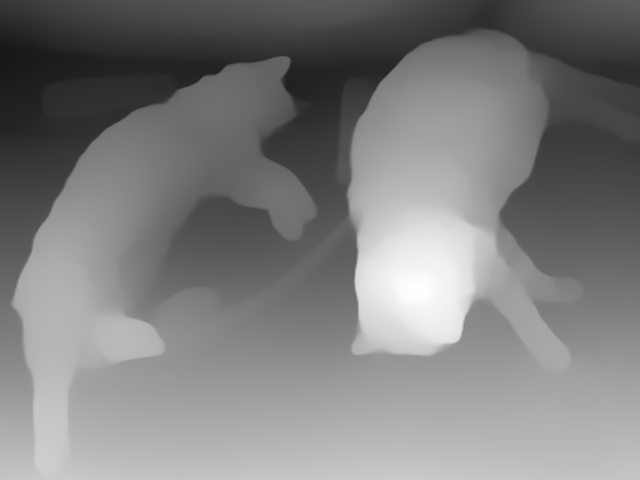

In [12]:
from transformers import pipeline

depth_estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")
output = depth_estimator("http://images.cocodataset.org/val2017/000000039769.jpg")

# This is a tensor with the values being the depth expressed
# in meters for each pixel
output["depth"]

A interface permanece a mesma mesmo para tarefas como resposta visual a perguntas:

In [13]:
from transformers import pipeline

oracle = pipeline(model="dandelin/vilt-b32-finetuned-vqa")
image_url = "https://huggingface.co/datasets/mishig/sample_images/resolve/main/tiger.jpg"

oracle(question="What's the animal doing?", image=image_url, top_k=1)
# [{'score': 0.778620, 'answer': 'laying down'}]

[{'score': 0.778620183467865, 'answer': 'laying down'}]

##Treinando seus próprios modelos
Embora ser capaz de usar um modelo para inferência pronto para uso seja uma ótima maneira de começar, o ajuste fino é onde a comunidade obtém mais benefícios. Isso é especialmente verdadeiro quando seus conjuntos de dados são personalizados e você não obtém um bom desempenho dos modelos pré-treinados.

Transformers fornece uma API Trainer para tudo relacionado ao treinamento. Atualmente, o Trainer suporta perfeitamente as seguintes tarefas: classificação de imagens, segmentação de imagens, classificação de vídeo, detecção de objetos e estimativa de profundidade. Modelos de ajuste fino para outras tarefas de visão também são suportados, mas não pelo Trainer.

Contanto que o cálculo da perda seja incluído em um modelo do Transformers que calcula a perda para uma determinada tarefa, ele deve ser elegível para ajuste fino para a tarefa. Se você encontrar problemas, relate-os no GitHub.

##Integrações com conjuntos de dados
Os conjuntos de dados fornecem acesso fácil a milhares de conjuntos de dados de diferentes modalidades. Conforme mencionado anteriormente, o Hub possui mais de 100 conjuntos de dados para visão computacional. Alguns exemplos dignos de nota aqui: ImageNet-1k, Scene Parsing, NYU Depth V2, COYO-700M e LAION-400M. Com esses conjuntos de dados no Hub, é possível carregá-los facilmente com apenas duas linhas de código:

In [14]:
!pip install datasets

In [15]:
from datasets import load_dataset

dataset = load_dataset("scene_parse_150")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1491: FutureWarning: The repository for scene_parse_150 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/scene_parse_150
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Além desses conjuntos de dados, fornecemos suporte de integração com bibliotecas de aumento como albumentações e Kornia. A comunidade pode aproveitar a flexibilidade e o desempenho dos conjuntos de dados e das poderosas transformações de aumento fornecidas por essas bibliotecas. Além disso, também fornecemos guias de carregamento de dados dedicados para tarefas básicas de visão: classificação de imagens, segmentação de imagens, detecção de objetos e estimativa de profundidade.

##🤗 🤝tim
timm, também conhecido como modelos de imagem pytorch, é uma coleção de código aberto de modelos de imagem PyTorch de última geração, pesos pré-treinados e scripts utilitários para treinamento, inferência e validação.

Temos mais de 200 modelos da Timm no Hub e mais estão a caminho. Confira a documentação para saber mais sobre essa integração.

##🧨 Difusores
Os difusores fornecem modelos pré-treinados de visão e difusão de áudio e servem como uma caixa de ferramentas modular para inferência e treinamento. Com esta biblioteca, você pode gerar imagens plausíveis a partir de entradas de linguagem natural, entre outros casos de uso criativos. Aqui está um exemplo: